In [1]:
from sklearn import tree
import pandas as pd
import matplotlib as plt
import seaborn as sns

from sklearn.tree import plot_tree


In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style ="<style>svg{width^70% !imoprtant;height:70% !important;}</style>"
HTML(style)

In [4]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [5]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [6]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [7]:
clf

DecisionTreeClassifier(criterion='entropy')

In [8]:
X = data[['X_1', 'X_2']]
y = data.Y

In [9]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

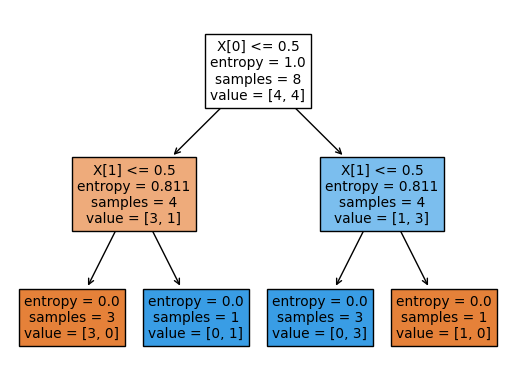

In [10]:
tree.plot_tree(clf,filled=True); 

In [ ]:
Представьте, что вы решили научить робота для животных отличать собачек от котиков. Для начала проанализируем данные - 
отметьте все верные утверждения о данном датафрэйме

In [11]:
dog_cat = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv')

In [12]:
dog_cat

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик


In [ ]:
Переменная Лазает по деревьям позволяет идеально различить 2 вида по исходным данным

Обе переменные Гавкает и Лазает по деревьям дают одинаковый Information Gain, если поместить их в вершину дерева

Для различения котиков от собачек, по этим данным, хватит всего 1-ой переменной

Переменная Гавкает позволяет идеально различить 2 вида по исходным данным

In [ ]:
В нашем Big Data датасэте появились новые наблюдения! Давайте немного посчитаем энтропию, чтобы лучше понять, 
формализуемость разделения на группы.

In [13]:
cat = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv')

In [14]:
cat

,Unnamed: 0,Шерстист,Гавкает,Лазает по деревьям,Вид
0,0,1,1,0,собачка
1,1,1,1,0,собачка
2,2,1,1,0,собачка
3,3,1,1,0,собачка
4,4,1,0,1,котик
5,5,1,0,1,котик
6,6,1,0,1,котик
7,7,1,0,1,котик
8,8,1,1,1,котик
9,9,0,0,1,котик


In [ ]:
Формат записи - энтропия в группе, где переменная равна 0 и энтропия в группе, где переменная равна 1 
(десятичный разделитель - точка, округляйте до 2-ого знака при необходимости).

In [15]:
import math

In [16]:
E_sh_sob=(1/1)*math.log2((1/1)) - 0
E_sh_kot=-(4/9)*math.log2((4/9)) - (5/9)*math.log2((5/9))
E_gav_sob=0 - (5/5)*math.log2((5/5))
E_gav_kot=-(4/5)*math.log2((4/5)) - (1/5)*math.log2((1/5))
E_laz_sob= (4/4)*math.log2((4/4)) - 0 
E_laz_kot=0 - (6/6)*math.log2((6/6))

In [17]:
E_sh_sob

0.0

In [18]:
E_sh_kot

0.9910760598382222

In [19]:
E_gav_sob

0.0

In [20]:
E_gav_kot

0.7219280948873623

In [21]:
E_laz_sob


0.0

In [22]:
E_laz_kot

0.0

In [23]:
from scipy.stats import entropy

def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)
print('Шерстист на 0: ', ent(df[df.Шерстист == 0]))
print('Шерстист на 1: ', ent(df[df.Шерстист == 1]))
print('Гавкает на 0: ', ent(df[df.Гавкает == 0]))
print('Гавкает на 1: ', ent(df[df.Гавкает == 1]))
print('Лазает по деревьям на 0: ', ent(df[df['Лазает по деревьям'] == 0]))
print('Лазает по деревьям на 1: ', ent(df[df['Лазает по деревьям'] == 1]))

Шерстист на 0:  0.0
Шерстист на 1:  0.9910760598382222
Гавкает на 0:  0.0
Гавкает на 1:  0.7219280948873623
Лазает по деревьям на 0:  0.0
Лазает по деревьям на 1:  0.0


In [ ]:
Ещё немного арифметики - посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые 
до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании 
является точка.
По какой переменной нужно делать сплит, исходя из всего этого (не вводите ответ на этот вопрос в поле, просто подумайте)

In [24]:
E = -(4/10)*math.log2((4/10)) - (6/10)*math.log2((6/10))

In [25]:
E

0.9709505944546686

In [26]:
IG_sh = E - ((1/10)*E_sh_sob + (9/10)*E_sh_kot)
IG_gav = E - ((5/10)*E_gav_sob + (5/10)*E_gav_kot)
IG_laz = E - ((6/10)*E_laz_sob + (6/10)*E_laz_kot)

In [27]:
round(IG_sh, 2)

0.08

In [28]:
round(IG_gav, 2)

0.61

In [29]:
IG_laz

0.9709505944546686

In [30]:
clf1 = tree.DecisionTreeClassifier(criterion='entropy')

In [31]:
X = cat[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = cat.Вид

In [32]:
clf1.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

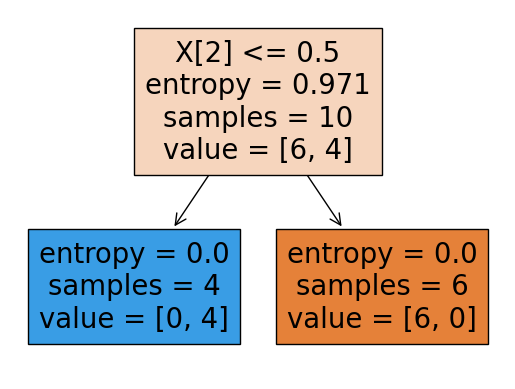

In [33]:
tree.plot_tree(clf1,filled=True); 

In [34]:
def ent(data):
  return entropy(data.Вид.value_counts() / len(data), base=2)


def ig(data, feature):
  ent0 = ent(data[data[feature] == 0])
  ent1 = ent(data[data[feature] == 1])
  n = len(data)
  n0 = len(data[data[feature] == 0])
  n1 = len(data[data[feature] == 1])
  return round(ent(data) - ent0 * n0 / n - ent1 * n1 / n, 2)


df = pd.read_csv('https://stepik.org/media/attachments/course/4852/cats.csv', index_col=0)

print('IG по шертистости: ', ig(df, 'Шерстист'))
print('IG по голосу: ', ig(df, 'Гавкает'))
print('IG по деревьям: ', ig(df, 'Лазает по деревьям'))

IG по шертистости:  0.08
IG по голосу:  0.61
IG по деревьям:  0.97


In [35]:
# Load train data
titanik_data = pd.read_csv('train.csv')

In [36]:
# Look
titanik_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Find NaN
Determine the sum of missing values by columns

In [37]:

titanik_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
# Remove redundant data that will not be used to build the model
X = titanik_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [39]:
# Let us replace the unknown values of age with its median value
X = X.fillna({'Age' : X.Age.median()})

In [40]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [41]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [42]:
# Get rid of string values, convert them to numbers
X = pd.get_dummies(X)

In [43]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,0,0,0,1
888,3,28.0,1,2,23.4500,1,0,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0


In [44]:
# Define the variable to be predicted
y = titanik_data.Survived

In [45]:
# Let's create a classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [46]:
#Train the model
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [47]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin' 

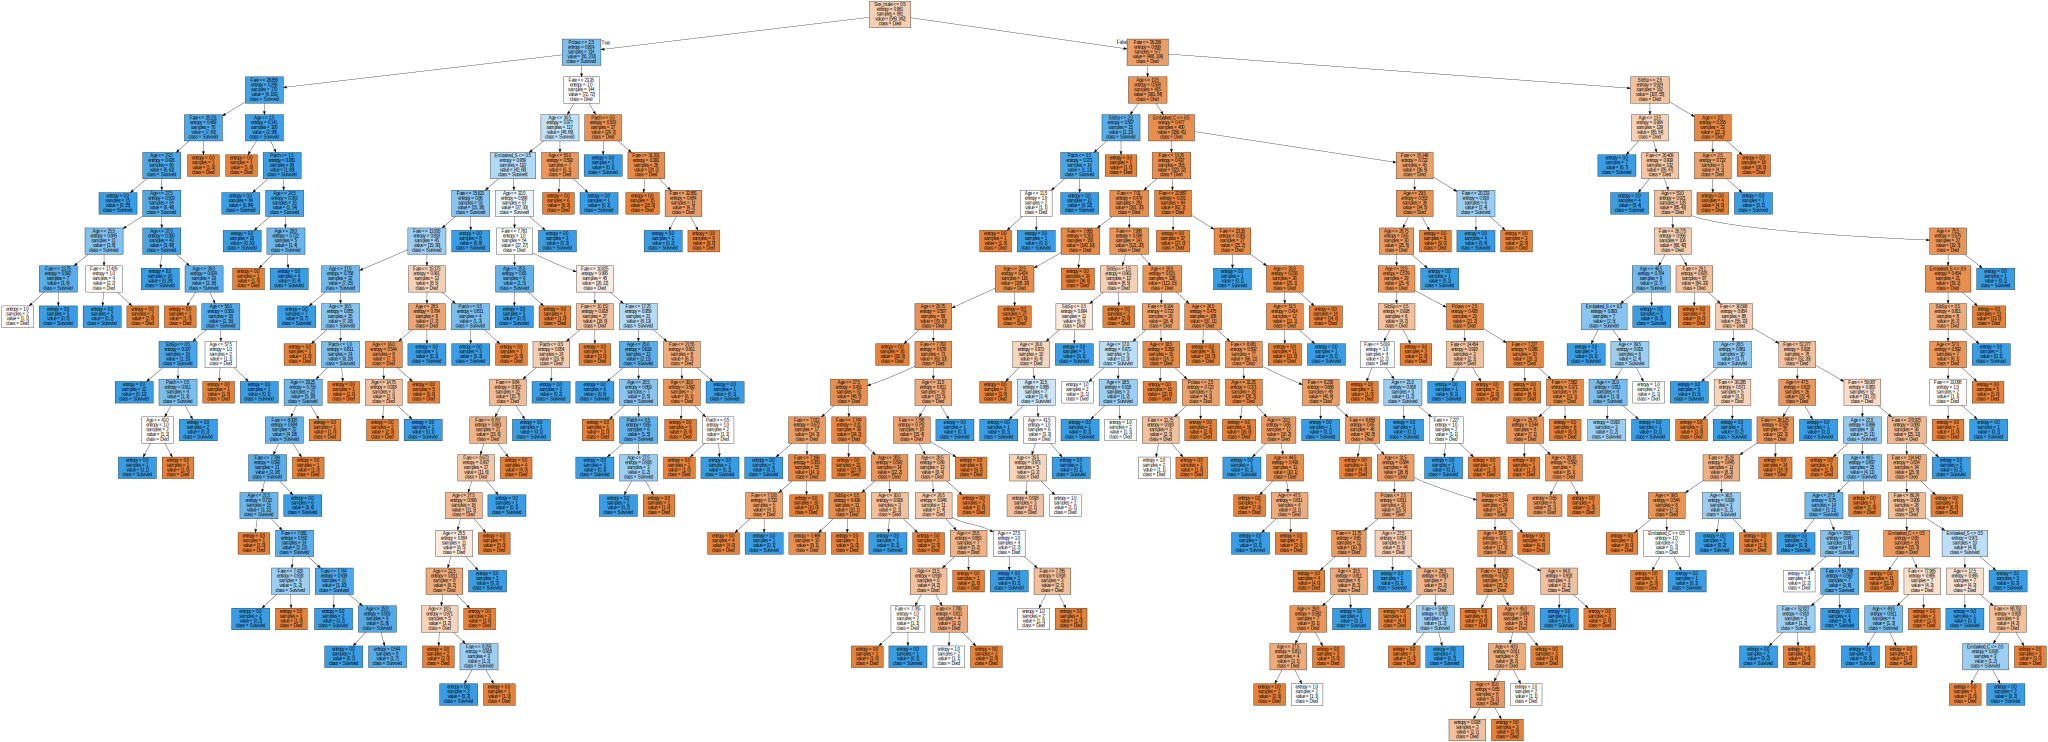

In [48]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [49]:
# determine the number of correct answers of our tree
clf.score(X, y)

0.9797979797979798

In [50]:
# Let's divide the data into the data on which our tree is trained and the data for the test
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [52]:
# train our model with new data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
# determine the number of correct answers of our tree
clf.score(X_train, y_train)

0.9798657718120806

In [54]:
# Let's check our model on data that the model has not seen
clf.score(X_test, y_test)

0.7728813559322034

In [55]:
# We got a fairly low percentage according to new data. May be due to retraining of the model.

In [56]:
# Limit the depth of the tree. The number 3 was chosen by comparing the percentages of the model definition
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [57]:
# train our model with new data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [58]:
# determine the number of correct answers of our tree
clf.score(X_train, y_train)

0.825503355704698

In [59]:
# Let's check our model on data that the model has not seen
clf.score(X_test, y_test)

0.8033898305084746

In [60]:
# Let's check our model for different depths
# Let's create a variable that will store the depth range
max_depth_values = range(1, 100)

In [61]:
# Let's create an empty dataframe into which we will write our values
scores_data = pd.DataFrame()

In [62]:
# Let's create a cycle over our range, which will determine the values of correct answers on the training and test data, 
#and record them in our data frame
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score' : [train_score], 
                                    'test_score' : [test_score]})
    scores_data = scores_data.append(temp_score_data)

In [63]:
scores_data

,max_depth,train_score,test_score
0,1,0.788591,0.783051
0,2,0.788591,0.783051
0,3,0.825503,0.803390
0,4,0.843960,0.813559
0,5,0.848993,0.806780
...,...,...,...
0,95,0.979866,0.772881
0,96,0.979866,0.769492
0,97,0.979866,0.772881
0,98,0.979866,0.766102


In [64]:
# we convert column values into rows with measured values, for convenient plotting
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score','test_score'],
                          var_name='set_type', value_name='score')

In [65]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.788591
1,2,train_score,0.788591
2,3,train_score,0.825503
3,4,train_score,0.843960
4,5,train_score,0.848993
...,...,...,...
193,95,test_score,0.772881
194,96,test_score,0.769492
195,97,test_score,0.772881
196,98,test_score,0.766102


<AxesSubplot:xlabel='max_depth', ylabel='score'>

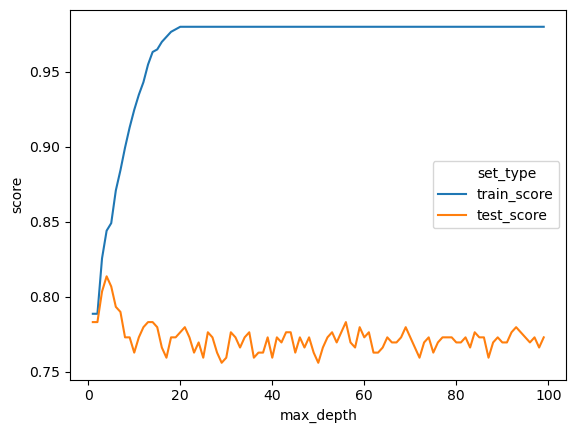

In [66]:
# Let's draw a graph
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [67]:
# Validation
from sklearn.model_selection import cross_val_score

In [68]:
# Let's look at the cross_cal_score function.
# To do this, we will recreate our classifier with a depth of 4 (the depth is chosen just like that)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [69]:
# Let's test the function
cross_val_score(clf, X_train, y_train, cv = 5)

array([0.8       , 0.82352941, 0.77310924, 0.79831933, 0.85714286])

In [70]:
# We have obtained the accuracy that our classifier shows

In [71]:
# Let's look at the average accuracy on cross-validation
cross_val_score(clf, X_train, y_train, cv = 5).mean()

0.8104201680672268

In [73]:
##################################################
# Pasted piece of code, lesson 2.6
from sklearn.model_selection import GridSearchCV

In [74]:
clf = tree.DecisionTreeClassifier()

In [75]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [76]:
grid_search_cv = GridSearchCV(clf , parametrs, cv = 5)

In [77]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [78]:
grid_search_cv.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [79]:
best_clf = grid_search_cv.best_estimator_

In [80]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [81]:
best_clf.score(X_test, y_test)

0.8135593220338984

In [82]:
from sklearn.metrics import precision_score, recall_score

In [83]:
y_pred = best_clf.predict(X_test)

In [84]:
precision_score(y_test, y_pred)

0.7745098039215687

In [85]:
recall_score(y_test, y_pred)

0.7117117117117117

In [86]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [87]:
y_predicted_prob

array([[0.85581395, 0.14418605],
       [0.85581395, 0.14418605],
       [1.        , 0.        ],
       [0.01470588, 0.98529412],
       [0.34375   , 0.65625   ],
       [0.60606061, 0.39393939],
       [0.01470588, 0.98529412],
       [0.01470588, 0.98529412],
       [0.60606061, 0.39393939],
       [0.34375   , 0.65625   ],
       [0.85581395, 0.14418605],
       [0.12244898, 0.87755102],
       [0.85581395, 0.14418605],
       [0.12244898, 0.87755102],
       [0.01470588, 0.98529412],
       [0.34375   , 0.65625   ],
       [0.85581395, 0.14418605],
       [0.85581395, 0.14418605],
       [0.94736842, 0.05263158],
       [0.        , 1.        ],
       [0.85581395, 0.14418605],
       [0.01470588, 0.98529412],
       [0.85581395, 0.14418605],
       [0.60606061, 0.39393939],
       [0.34375   , 0.65625   ],
       [0.01470588, 0.98529412],
       [0.85581395, 0.14418605],
       [0.34375   , 0.65625   ],
       [0.12244898, 0.87755102],
       [0.89473684, 0.10526316],
       [0.

<AxesSubplot:>

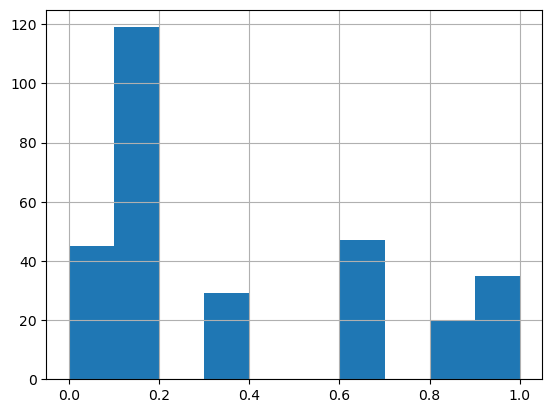

In [88]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [99]:
import numpy as np
y_pred = np.where(y_predicted_prob[:, 1] >0.8, 1, 0)

In [100]:
precision_score(y_test, y_pred)

0.9636363636363636

In [101]:
recall_score(y_test, y_pred)

0.4774774774774775

In [102]:

y_pred = np.where(y_predicted_prob[:, 1] >0.2, 1, 0)

In [103]:
precision_score(y_test, y_pred)

0.6946564885496184

In [104]:
recall_score(y_test, y_pred)

0.8198198198198198

In [105]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

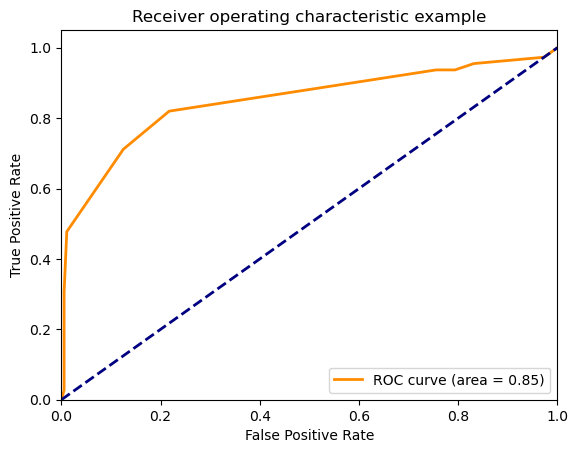

In [106]:
lw = 2
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [258]:
# End of lesson 2.6
###############################

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
292,95,cross_val_score,0.768501
293,96,cross_val_score,0.780266
294,97,cross_val_score,0.773529
295,98,cross_val_score,0.765140


In [263]:
sns.lineplot(x='max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [264]:
# Let's create a new classifier with the received data
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [265]:
# We will test it on the final data
cross_val_score(best_clf, X_test, y_test, cv = 5).mean()

0.8033898305084746

In [266]:
# Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами, обучите деревья с 
# глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор 
# (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом 
# датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную 
# визуализацию из предложенных.
# Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)
# np.random.seed(0)
# my_awesome_tree = DecisionTreeClassifier(...)
# или
# my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)

In [267]:
# Create dataframes with training and test data
test_data_set = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv')
train_data_set = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv')

In [268]:
# Determine the data on which we will train and test our tree
X_train = train_data_set.drop(['Unnamed: 0', 'species'], axis=1)
X_test = test_data_set.drop(['Unnamed: 0', 'species'], axis=1)

In [269]:
# We define the variable that we will predict for the training and test models
y_train = train_data_set.species
y_test = test_data_set.species

In [270]:
import numpy as np
rs = np.random.seed(0)

In [271]:
# create an empty dataframe and define a depth range
scores_data = pd.DataFrame()
max_depth_values = range(1, 100)

In [272]:
# Creating a classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [273]:
# determine the necessary data for our range and write them to a new dataframe
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    accuracy_scores = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'score' : [train_score], 
                                    'test' : [accuracy_scores]})
    scores_data = scores_data.append(temp_score_data)

In [274]:
scores_data

,max_depth,score,test
0,1,0.70,0.65
0,2,0.96,0.96
0,3,0.98,0.97
0,4,1.00,0.96
0,5,1.00,0.97
...,...,...,...
0,95,1.00,0.97
0,96,1.00,0.97
0,97,1.00,0.96
0,98,1.00,0.97


In [275]:
# we convert column values into rows with measured values, for convenient plotting
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], 
                           value_vars=['score', 'test'],
                          var_name='set_type', value_name='scores')

<AxesSubplot:xlabel='max_depth', ylabel='scores'>

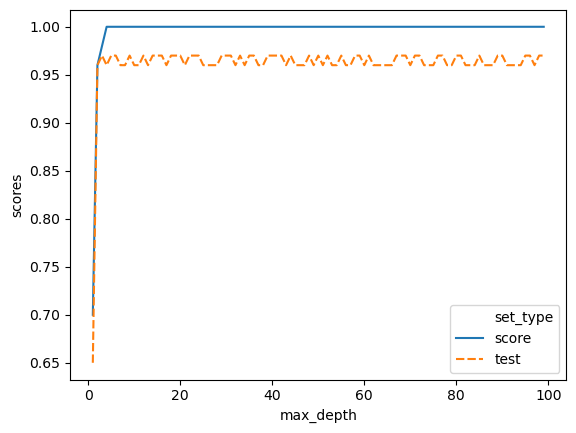

In [276]:
# Let's draw a graph
sns.lineplot(x='max_depth', y = 'scores', hue = 'set_type', data = scores_data_long, style="set_type")

In [277]:
# Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! 
# Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите 
# какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.
# В задании допускается определённая погрешность.
# P. S.: данные в задании находятся в формате json, используйте метод pd.read_json для их прочтения

In [278]:
# Reading test data
train_dataset = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [279]:
train_dataset

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [280]:
# Determine the data on which we will train and test our tree
# We define the variable that we will predict for the training and test models
X = train_dataset.drop(['Вид'], axis=1)
y = train_dataset['Вид']

In [281]:
# # Let's divide the data into the data on which our tree is trained and the data for the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [282]:
# # Creating a classifier
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [283]:
# Train our tree with training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

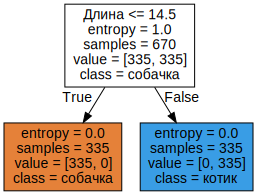

In [284]:
# Visualizing our tree
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X), \
                                    class_names=['собачка', 'котик'], filled=True))
display(SVG(graph.pipe(format='svg')))

In [285]:
# Checking our tree on test data
clf.score(X_test, y_test)

1.0

In [286]:
# Checking our tree on train data
clf.score(X_train, y_train)
# The result is impressive - 100%

1.0

In [287]:
# Reading data for prediction
test_dataset = pd.read_json(r'dataset_209691_15.txt')

In [288]:
test_dataset

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,33,39.6,1,0,0
1,22,26.4,0,1,0
2,31,37.2,1,1,0
3,33,39.6,1,0,0
4,20,24.0,1,1,0
...,...,...,...,...,...
95,10,4.0,1,0,1
96,7,2.8,1,0,1
97,5,2.0,1,0,1
98,8,3.2,1,0,1


In [289]:
# We determine the data on which we will make a prediction
X_test = test_dataset

In [290]:
# Getting a result
result = clf.predict(X_test)

In [291]:
# Counting the number of dogs
pd.Series(result)[result == 'собачка'].count()


51

In [292]:
# Возвращаемся к дэйтингу, некий Анатолий зарегистрировался в приложении знакомств, некий алгоритм на основе машинного 
# обучения порекомендовал Анатолию 30 фотографий из 100. Анатолий лайкнул 15 фотографий из 30 предложенных, в дальнейшем 
# выяснилось, что Анатолий мог бы лайкнуть еще 30 фотографий из 70 непредложенных.
# Будем считать, что  лайк Анатолия является положительным исходом, а отсутствие лайка - отрицательным. Соответственно 
# предсказанный лайк, совпавший с реальным - True positive, предсказанный лайк, не завершившийся реальным лайком - 
# False positive и т. д. Давайте оценим работу алгоритма с точки зрения метрик качества модели.
#	          Predicted likes	Predicted dislikes
# Real likes	    15	               30
# Real dislikes	    15	               40
# Такой формат представления предсказания модели и реальных исходов называется confusion matrix. Глядя на такую таблицу, 
# легко можно понять, где именно ошибается наша модель. А также рассчитать различные метрики качества модели.
#
#Precision
#Recall
#F1 score

In [293]:
True_pozitive = 15
False_positive = 15
False_negative = 30
True_negative = 40
Precision = True_pozitive / (True_pozitive+False_positive)
Recall = True_pozitive/(True_pozitive+False_negative)
F1 = 2 * (Precision * Recall) / (Precision + Recall)
print('Precision = ', Precision)
print('Recall = ', Recall)
print('F1=', F1)

Precision =  0.5
Recall =  0.3333333333333333
F1= 0.4


In [294]:
# Поупражняемся в расчётах precision. В задании даны переменные, содержащие информацию о песнях и артистах - X_train, y_train,
# X_test и y_test. Исходно в датасэтах содержались тексты песен, но Decision Tree работает с категориальными и числовыми 
# переменными, а текст это... текст. Поэтому его необходимо преобразовать в понятную для модели форму. В данном случае для 
# каждой песни просто посчитаны длина и количество некоторых знаков пунктуации.
# Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. 
# Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в 
# переменную precision.
# Если он будет недостаточно высок, потюньте немного модель.
# Исходные данные взяты отсюда, слегка процессированные можно взять здесь (исходные колонки типа жанра, года были выкинуты 
# в задании)

In [295]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
datatest = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [296]:
datatest

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [297]:
X = datatest.drop(['artist', 'song', 'lyrics'], axis=1)
X= pd.get_dummies(X)
y = datatest['artist']

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1, random_state = 42)

In [299]:
X_train

,year,length,commas,exclamations,colons,hyphens,genre_Hip-Hop,genre_Metal,genre_Pop
42,2006,3200,41,0,0,0,1,0,0
285,2006,843,16,0,0,1,0,0,1
302,1995,877,10,5,0,8,0,0,1
56,2010,1238,12,0,0,0,0,0,1
272,2006,3085,47,2,0,4,1,0,0
...,...,...,...,...,...,...,...,...,...
71,2006,2891,46,0,0,9,1,0,0
106,2006,847,7,0,0,0,1,0,0
270,2008,4431,48,0,0,29,1,0,0
348,2008,1820,20,0,0,0,1,0,0


In [300]:
precision = 0
max_depth = 0
while precision < 0.78:
    max_depth += 1
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    predictions = clf.fit(X_train, y_train).predict(X_test)
    precision = precision_score(y_test, predictions, average='micro')

In [301]:
predictions

array(['abba'], dtype=object)

In [302]:
precision

1.0

In [0]:
# Начнём с простого - создайте Decision Tree классификатор, используя одноимённый класс из библиотеки sklearn и сохраните 
# его в переменную dt.
# У дерева должны быть следующие параметры:
# максимальная глубина - 5 уровней
# минимальное число образцов в вершине для разделения - 5
# Подробнее узнать об имеющихся параметрах Decision Tree можно узнать в документации.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier( max_depth=5, min_samples_split = 5)

In [1]:
# Скачайте набор данных с тремя переменными: sex, exang, num. Представьте, что при помощи дерева решений мы хотим 
# классифицировать есть или нет у пациента заболевание сердца (переменная num), основываясь на двух признаках: пол (sex) 
# и наличие/отсутсвие стенокардии (exang). Обучите дерево решений на этих данных, используйте entropy в качестве критерия.
# Укажите, чему будет равняться значение Information Gain для переменной,  которая будет помещена в корень дерева.
# В ответе необходимо указать число с точностью 3 знака после запятой.

In [51]:
import pandas as pd
# read data
pacient = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')

In [52]:
#view
pacient

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1
3,1,0,0
4,1,0,1
...,...,...,...
233,1,0,0
234,1,1,0
235,1,0,1
236,1,1,1


In [53]:
# find is NaN
pacient.isnull().sum()

sex      0
exang    0
num      0
dtype: int64

In [54]:
# creat variable which we will determine the variable that we will predict
X_pacient = pacient.drop('num', axis =1)
y_pacient = pacient.num

In [55]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [57]:
clf.fit(X_pacient,y_pacient)

DecisionTreeClassifier(criterion='entropy')

[Text(0.5, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(0.25, 0.5, 'X[0] <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(0.75, 0.5, 'X[0] <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

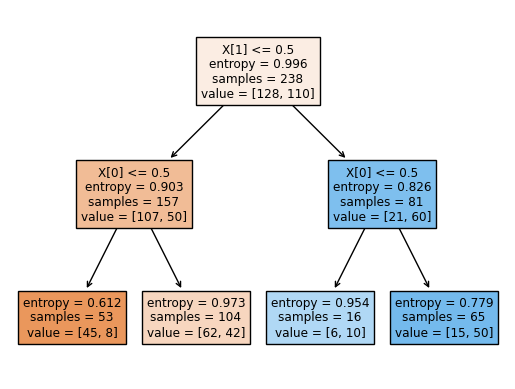

In [58]:
tree.plot_tree(clf, filled=True)

In [77]:
l_node = clf.tree_.children_left[0]
r_node = clf.tree_.children_right[0]
n1 = clf.tree_.n_node_samples[l_node]
E1 = clf.tree_.impurity[l_node]
n2 = clf.tree_.n_node_samples[r_node]
E2 = clf.tree_.impurity[r_node]
N = n1 +n2
E0 = clf.tree_.impurity[0]
IG = E0 - (n1*E1 + n2*E2)/N 

In [79]:
round(IG, 3)


0.119

In [80]:
# Теперь, создав дерево, давайте обучим его и попробуем что-нибудь предсказать!
# Для начала опробуем наше дерево на классическом наборе iris, где собраны данные о длине, ширине чашелистиков и 
# лепестков ирисов и их принадлежности к виду. В sklearn он уже встроен, что довольно удобно.
# Итак, вам даны 2 numpy эррея с измеренными признаками ирисов и их принадлежностью к виду. Сначала попробуем примитивный 
# способ с разбиением данных на 2 датасэта. Используйте функцию train_test_split для разделения имеющихся данных на
# тренировочный и тестовый наборы данных, 75% и 25% соответственно.
# Затем создайте дерево dt с параметрами по умолчанию и обучите его на тренировочных данных, а после предскажите классы, к 
# которым принадлежат данные из тестовой выборки, сохраните результат предсказаний в переменную predicted.

In [97]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


iris = load_iris()
X_iris = iris.data
y_iris = iris.target

In [95]:
?train_test_split

In [98]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size = 0.25 )

In [99]:
dt = tree.DecisionTreeClassifier(criterion='entropy')

In [100]:
dt.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(criterion='entropy')

In [102]:
predicted = dt.predict(X_test_iris)

In [104]:
# Одно дерево - хорошо, но где гарантии, что оно является лучшим, или хотя бы близко к нему? Одним из способов найти 
# более-менее оптимальный набор параметров дерева является перебор множества деревьев с разными параметрами и выбор 
# подходящего.
# Для этой цели существует класс GridSearchCV, перебирающий каждое из сочетаний параметров среди заданных для модели, 
# обучающий её на данных и проводящих кросс-валидацию. После этого в аттрибуте .best_estimator_ храниться модель с лучшими 
# параметрами.
# Это применимо не только к деревьям, но и к другим моделям sklearn.
# Теперь задание - осуществите перебор всех деревьев на данных ириса по следующим параметрам:
# максимальная глубина - от 1 до 10 уровней
# минимальное число проб для разделения - от 2 до 10
# минимальное число проб в листе - от 1 до 10
# и сохраните в переменную best_tree лучшее дерево. Переменную с GridSearchCV назовите search


In [105]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [113]:
clf = tree.DecisionTreeClassifier()

In [108]:
?GridSearchCV

In [114]:
parametrs = {'criterion': ['gini', 'entropy'], 
             'max_depth': range(1, 10), 
             'min_samples_split': range(2,10), 
             'min_samples_leaf': range(1,10)}

In [115]:
search = GridSearchCV(clf , parametrs, cv = 5)

In [116]:
search.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [120]:
best_tree = search.best_estimator_

In [121]:
best_tree

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [122]:
# Чем больше данных, сложность модели и число её параметров, тем дольше будет вестись поиск GridSearchCV. Однако бывают случаи,
# когда модель нужна здесь и сейчас, и для этого есть RandomizedSearchCV! Пробегаясь по рандомной подвыборке параметров, он 
# ищет наиболее хорошую модель и делает это быстрее полного перебора параметров, хотя и может пропустить оптимальные параметры.
# Здесь можно посмотреть на сравнение этих поисков.
# Осуществим поиск по тем же параметрам что и в предыдущем задании с помощью RandomizedSearchCV
# максимальная глубина - от 1 до 10 уровней
# минимальное число проб для разделения - от 2 до 10
# минимальное число проб в листе - от 1 до 10
# Cохраните в переменную best_tree лучшее дерево. Переменную с RandomizedSearchCV назовите search

In [126]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

clf = tree.DecisionTreeClassifier()

parametrs = {'criterion': ['gini', 'entropy'], 
             'max_depth': range(1, 10), 
             'min_samples_split': range(2,10), 
             'min_samples_leaf': range(1,10)}

search = RandomizedSearchCV(clf , parametrs, cv = 5, n_iter = 10, n_jobs=-1)
search.fit(X, y)

best_tree = search.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [ ]:
# Воспользуемся изученными приёмами и попредсказываем!

#Даны 2 датасэта, к которым вы можете обращаться:

#    train - размеченный с известными правильным ответами (хранятся в колонке y)
#    test - набор, где нужно предсказать их
# Найдите дерево с наиболее подходящими параметрами с помощью GridSearchCV и предскажите с его помощью ответы ко 2-ому сэту!
# Границы параметров как раньше:

# максимальная глубина - от 1 до 10 уровней
# минимальное число проб для разделения - от 2 до 10
# минимальное число проб в листе - от 1 до 10
# Названия переменных тоже:лучшее дерево - best_tree, GridSearchCV - search, а предсказания - predictions

In [133]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris = load_iris()
x = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(x, y)

train = pd.DataFrame(X_train)
train['y'] = y_train
test = pd.DataFrame(X_test)

X = train.drop('y', axis = 1)
y = train.y

clf = DecisionTreeClassifier()

parametrs = {'criterion': ['gini', 'entropy'], 
             'max_depth': range(1, 10), 
             'min_samples_split': range(2,10), 
             'min_samples_leaf': range(1,10)}
search = GridSearchCV(clf , parametrs, cv = 5)
search.fit(X, y)
best_tree = search.best_estimator_
predictions = best_tree.predict(test)
predictions

array([2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1, 0, 2, 0, 2,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 0])

In [135]:
# При классификации модель может допускать ошибки, присваивая наблюдению неверный класс. Существуют различные метрики оценки 
# качества предсказаний, которые базируются на 4-ёх параметрах - true positive, false positive, false negative и true negative,
# соответствующих тому какой класс был присвоен наблюдениям каждого из классов. Матрицу из 4-ёх (в случае бинарной 
#классификации) этих параметров называют confusion matrix.

# В sklearn можно её удобно получить с помощью функции confusion_matrix. Вам даны 2 эррея с истинными классами наблюдений и 
# предсказанными - y и predictions. Получите по ним confusion matrix и поместите её в переменную conf_matrix.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y, predictions)